In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import files
x = files.upload()

Saving dataset.csv to dataset.csv


In [3]:
file_path = list(x.keys())[0]
df = pd.read_csv(file_path)

# Display first few rows
print("Dataset Head:")
print(df.head())

Dataset Head:
   Feature_1  Feature_2  Feature_3  Feature_4  Feature_5  Feature_6  \
0        NaN  -1.382643   6.476885  15.230299  -2.341534  -2.341370   
1  -6.017066  18.522782  -0.134972 -10.577109   8.225449 -12.208436   
2 -47.917424  -1.856590 -11.063350 -11.962066   8.125258  13.562400   
3   0.970775   9.686450  -7.020531  -3.276621  -3.921082 -14.635149   
4        NaN  -9.093875        NaN -14.018511   5.868571  21.904556   

   Feature_7  Feature_8  Feature_9  Feature_10  ...  Feature_21  Feature_22  \
0  15.792128   7.674347  -4.694744    5.425600  ...   14.656488   -2.257763   
1   2.088636 -19.596701 -13.281860    1.968612  ...         NaN   -3.850823   
2  -0.720101        NaN   3.616360   -6.451198  ...   -2.196719         NaN   
3   2.961203   2.610553   0.051135   -2.345871  ...  -19.187712   -0.265139   
4  -9.905363  -5.662977   0.996514   -5.034757  ...    2.274599   13.071428   

   Feature_23  Feature_24  Feature_25  Feature_26  Feature_27  Feature_28  \
0    0.

In [4]:
print("Dataset Info:")
print(df.info())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1050 entries, 0 to 1049
Data columns (total 30 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Feature_1   943 non-null    float64
 1   Feature_2   938 non-null    float64
 2   Feature_3   945 non-null    float64
 3   Feature_4   956 non-null    float64
 4   Feature_5   949 non-null    float64
 5   Feature_6   943 non-null    float64
 6   Feature_7   947 non-null    float64
 7   Feature_8   951 non-null    float64
 8   Feature_9   951 non-null    float64
 9   Feature_10  948 non-null    float64
 10  Feature_11  938 non-null    float64
 11  Feature_12  956 non-null    float64
 12  Feature_13  963 non-null    float64
 13  Feature_14  964 non-null    float64
 14  Feature_15  966 non-null    float64
 15  Feature_16  946 non-null    float64
 16  Feature_17  948 non-null    float64
 17  Feature_18  948 non-null    float64
 18  Feature_19  958 non-null    float64
 19  Feature_20  9

In [5]:
# Handle missing values:
print("Dataset Head before handling missing values:\n", df.isnull().sum())
df.loc[0:10, 'Feature_1'] = np.nan
df.fillna(df.mean(), inplace=True)
print("Dataset Head after handling missing values:\n", df.isnull().sum())

Dataset Head before handling missing values:
 Feature_1     107
Feature_2     112
Feature_3     105
Feature_4      94
Feature_5     101
Feature_6     107
Feature_7     103
Feature_8      99
Feature_9      99
Feature_10    102
Feature_11    112
Feature_12     94
Feature_13     87
Feature_14     86
Feature_15     84
Feature_16    104
Feature_17    102
Feature_18    102
Feature_19     92
Feature_20     89
Feature_21     93
Feature_22    114
Feature_23    102
Feature_24    107
Feature_25     92
Feature_26    100
Feature_27     92
Feature_28     99
Feature_29    110
Feature_30     97
dtype: int64
Dataset Head after handling missing values:
 Feature_1     0
Feature_2     0
Feature_3     0
Feature_4     0
Feature_5     0
Feature_6     0
Feature_7     0
Feature_8     0
Feature_9     0
Feature_10    0
Feature_11    0
Feature_12    0
Feature_13    0
Feature_14    0
Feature_15    0
Feature_16    0
Feature_17    0
Feature_18    0
Feature_19    0
Feature_20    0
Feature_21    0
Feature_22    0
Feat

In [6]:
# 1. Tree Models:
# 1) Three different decision tree models:
# a) Decision Tree Classifier:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]
y_discrete = (y > np.median(y)).astype(int)
# Split data into training and testing sets (Holdout method)
X_train, X_test, y_train, y_test = train_test_split(X, y_discrete, test_size=0.2, random_state=42)

# Initialize and train the Decision Tree Classifier
tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)

# Predictions and Evaluation
y_pred_tree = tree_clf.predict(X_test)

# Evaluation Metrics
print("Decision Tree Classifier Results")
print("Accuracy:", accuracy_score(y_test, y_pred_tree))
print("Precision:", precision_score(y_test, y_pred_tree))
print("Recall:", recall_score(y_test, y_pred_tree))
print("F1 Score:", f1_score(y_test, y_pred_tree))

Decision Tree Classifier Results
Accuracy: 0.48095238095238096
Precision: 0.4411764705882353
Recall: 0.4639175257731959
F1 Score: 0.45226130653266333


In [7]:
# b) Random Forest Classifier:
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)

# Predictions and Evaluation
y_pred_rf = rf_clf.predict(X_test)

# Evaluation Metrics
print("Random Forest Classifier Results")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Precision:", precision_score(y_test, y_pred_rf))
print("Recall:", recall_score(y_test, y_pred_rf))
print("F1 Score:", f1_score(y_test, y_pred_rf))

Random Forest Classifier Results
Accuracy: 0.5095238095238095
Precision: 0.4375
Recall: 0.21649484536082475
F1 Score: 0.2896551724137931


In [8]:
# c) Gradient Boosting Classifier:
gb_clf = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_clf.fit(X_train, y_train)

# Predictions and Evaluation
y_pred_gb = gb_clf.predict(X_test)

# Evaluation Metrics
print("Gradient Boosting Classifier Results")
print("Accuracy:", accuracy_score(y_test, y_pred_gb))
print("Precision:", precision_score(y_test, y_pred_gb))
print("Recall:", recall_score(y_test, y_pred_gb))
print("F1 Score:", f1_score(y_test, y_pred_gb))

Gradient Boosting Classifier Results
Accuracy: 0.4857142857142857
Precision: 0.4266666666666667
Recall: 0.32989690721649484
F1 Score: 0.37209302325581395


K-Nearest Neighbors Classifier Results
Accuracy: 0.5190476190476191
Precision: 0.47368421052631576
Recall: 0.3711340206185567
F1 Score: 0.4161849710982659


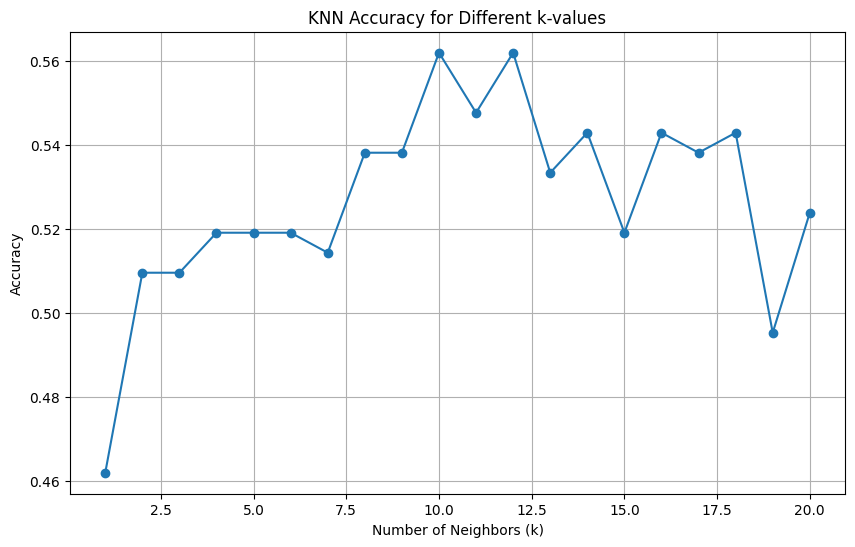

In [9]:
#2. KNN Model:
#1) K-Nearest Neighbors algorithm and the optimal value of kk by plotting its performance against different kk-values:
# K-Nearest Neighbors Classifier:
knn_clf = KNeighborsClassifier(n_neighbors=5)
knn_clf.fit(X_train, y_train)

# Predictions and Evaluation
y_pred_knn = knn_clf.predict(X_test)

# Evaluation Metrics
print("K-Nearest Neighbors Classifier Results")
print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print("Precision:", precision_score(y_test, y_pred_knn))
print("Recall:", recall_score(y_test, y_pred_knn))
print("F1 Score:", f1_score(y_test, y_pred_knn))

# Evaluate KNN for different k-values
k_values = range(1, 21)
knn_accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    knn_accuracies.append(accuracy_score(y_test, y_pred))

# Plotting the performance
plt.figure(figsize=(10, 6))
plt.plot(k_values, knn_accuracies, marker='o')
plt.title('KNN Accuracy for Different k-values')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.grid()
plt.show()

In [10]:
# 3. Optimal kk for KNN:
# a) The best-fit kk for KNN by visualizing performance metrics across varying kk-values:
# Optimal k
optimal_k = k_values[np.argmax(knn_accuracies)]
print(f"Optimal k for KNN: {optimal_k}")

# Evaluate KNN with optimal k
best_knn = KNeighborsClassifier(n_neighbors=optimal_k)
best_knn.fit(X_train, y_train)

# Predictions and Evaluation
y_pred_oknn = best_knn.predict(X_test)

# Evaluation Metrics
print("Optimal KNN Results")
print("Accuracy:", accuracy_score(y_test, y_pred_oknn))
print("Precision:", precision_score(y_test, y_pred_oknn))
print("Recall:", recall_score(y_test, y_pred_oknn))
print("F1 Score:", f1_score(y_test, y_pred_oknn))


Optimal k for KNN: 10
Optimal KNN Results
Accuracy: 0.5619047619047619
Precision: 0.5471698113207547
Recall: 0.29896907216494845
F1 Score: 0.38666666666666666
